In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sp_data = pd.read_csv(r'C:\Users\Niranjan\Desktop\Data Science\datasets/DGS10.csv')
sp_data.head()

,DATE,DGS10
0,2014-10-03,2.45
1,2014-10-06,2.43
2,2014-10-07,2.36
3,2014-10-08,2.35
4,2014-10-09,2.34


In [5]:
# Convert exchange rate to a number, with coersion to throw NA's if conversion not possible
sp_data['price'] = pd.to_numeric(sp_data.DGS10, errors='coerce')
sp_data.index = pd.to_datetime(sp_data.DATE)
# Remove NA's
sp_data.dropna(inplace=True)
sp_data.head()

,DATE,DGS10,price
DATE,,,
2014-10-03,2014-10-03,2.45,2.45
2014-10-06,2014-10-06,2.43,2.43
2014-10-07,2014-10-07,2.36,2.36
2014-10-08,2014-10-08,2.35,2.35
2014-10-09,2014-10-09,2.34,2.34


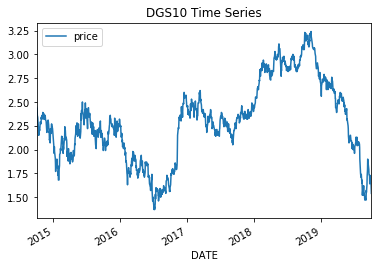

In [7]:
sp_data.plot()
plt.title('DGS10 Time Series')
plt.show()

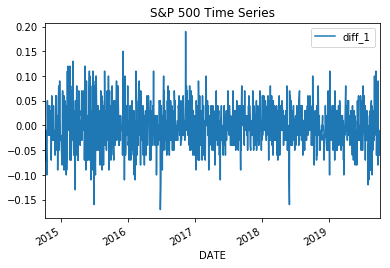

In [8]:
sp_data['diff_1'] = sp_data.price - sp_data.price.shift()
sp_data.plot(y='diff_1')
plt.title('DGS10 Time Series')
plt.show()

In [9]:
sp_data.head()

,DATE,DGS10,price,diff_1
DATE,,,,
2014-10-03,2014-10-03,2.45,2.45,NaN
2014-10-06,2014-10-06,2.43,2.43,-0.02
2014-10-07,2014-10-07,2.36,2.36,-0.07
2014-10-08,2014-10-08,2.35,2.35,-0.01
2014-10-09,2014-10-09,2.34,2.34,-0.01


Text(0.5, 1.0, 'DGS10 PACF')

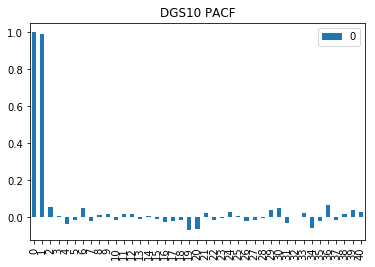

In [10]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(sp_data.price))
x_acf.plot(kind='bar')
plt.title("DGS10 PACF")

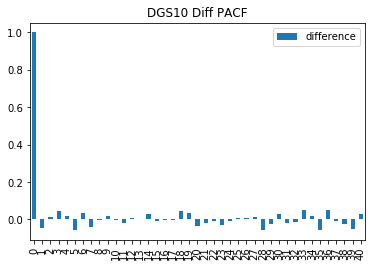

In [11]:
x_acf = pd.DataFrame(pacf(sp_data.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("DGS10 Diff PACF")
plt.legend(['difference'])

In [12]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sp_data.price, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 1250
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2165.229
Method:                           css   S.D. of innovations              0.043
Date:                Tue, 08 Oct 2019   AIC                          -4326.458
Time:                        00:02:13   BIC                          -4316.196
Sample:                             1   HQIC                         -4322.600
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0007      0.001     -0.601      0.548      -0.003       0.002
Residuals Description
count    1.250000e+03
mean     7.318600e-10
std      4.282122e-02
min     -1.692720e-01
25%     -2.927200e-02

c:\users\niranjan\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\niranjan\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [13]:
model = ARIMA(sp_data.price, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 1251
Model:                     ARMA(1, 0)   Log Likelihood                2165.855
Method:                       css-mle   S.D. of innovations              0.043
Date:                Tue, 08 Oct 2019   AIC                          -4325.709
Time:                        00:10:33   BIC                          -4310.314
Sample:                             0   HQIC                         -4319.922
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.2183      0.223      9.968      0.000       1.782       2.654
ar.L1.price     0.9953      0.003    377.272      0.000       0.990       1.000
                                    Roots       

c:\users\niranjan\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [14]:
model = ARIMA(sp_data.price, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

c:\users\niranjan\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 1251
Model:                     ARMA(1, 1)   Log Likelihood                2167.104
Method:                       css-mle   S.D. of innovations              0.043
Date:                Tue, 08 Oct 2019   AIC                          -4326.209
Time:                        00:11:03   BIC                          -4305.682
Sample:                             0   HQIC                         -4318.492
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.2129      0.231      9.562      0.000       1.759       2.667
ar.L1.price     0.9957      0.003    396.503      0.000       0.991       1.001
ma.L1.price    -0.0441      0.028     -1.586    

In [15]:
model_111 = ARIMA(sp_data.price, order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('Residuals Description')
print(model_111_fit.resid.describe())

c:\users\niranjan\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\niranjan\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 1250
Model:                 ARIMA(1, 1, 1)   Log Likelihood                2166.706
Method:                       css-mle   S.D. of innovations              0.043
Date:                Tue, 08 Oct 2019   AIC                          -4325.412
Time:                        00:11:35   BIC                          -4304.889
Sample:                             1   HQIC                         -4317.697
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0007      0.001     -0.627      0.531      -0.003       0.002
ar.L1.D.price    -0.1383      0.360     -0.384      0.701      -0.844       0.567
ma.L1.D.price     0.0901      0.361     

In [18]:
model = ARIMA(sp_data.price, order=(2,0,2))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

c:\users\niranjan\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 1251
Model:                     ARMA(2, 2)   Log Likelihood                2167.990
Method:                       css-mle   S.D. of innovations              0.043
Date:                Tue, 08 Oct 2019   AIC                          -4323.979
Time:                        00:13:01   BIC                          -4293.189
Sample:                             0   HQIC                         -4312.405
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.2202      0.220     10.096      0.000       1.789       2.651
ar.L1.price     1.5040      0.298      5.055      0.000       0.921       2.087
ar.L2.price    -0.5065      0.296     -1.710    